# Energy Efficiency Prediction using Multioutput Regression Models

## Install Libraries

In [1]:
import numpy as np
import pandas as pd 

import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

from sklearn import preprocessing
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

from sklearn.multioutput import MultiOutputRegressor
from sklearn.svm import SVR
from sklearn.svm import LinearSVR

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

from sklearn.model_selection import GridSearchCV
import time

## Read the  dataset
### The dataset is taken from UCI machine learning repository and can also be found in Kaggle https://archive.ics.uci.edu/dataset/242/energy+efficiency


In [2]:
data = pd.read_csv('energy_efficiency_data.csv')
data.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [3]:
# data  labels rename
data.rename(columns = {'X1': 'Relative_Compactness', 'X2':'Surface_Area', 'X3':'Wall_Area', 'X4':'Roof_Area', 'X5':'Overall_Height', 'X6':'Orientation', 'X7':'Glazing_Area', 'X8':'GA_Distribution', 'Y1':'Heating_Load' , 'Y2':'Cooling_Load'}, inplace = True)
data.head()

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,GA_Distribution,Heating_Load,Cooling_Load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


## Data Understanding 

In [4]:
# Dimensions
data.shape

(768, 10)

In [5]:
# Checking for missing data
data.isna().sum()

Relative_Compactness    0
Surface_Area            0
Wall_Area               0
Roof_Area               0
Overall_Height          0
Orientation             0
Glazing_Area            0
GA_Distribution         0
Heating_Load            0
Cooling_Load            0
dtype: int64

In [6]:
# Information about the Dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Relative_Compactness  768 non-null    float64
 1   Surface_Area          768 non-null    float64
 2   Wall_Area             768 non-null    float64
 3   Roof_Area             768 non-null    float64
 4   Overall_Height        768 non-null    float64
 5   Orientation           768 non-null    int64  
 6   Glazing_Area          768 non-null    float64
 7   GA_Distribution       768 non-null    int64  
 8   Heating_Load          768 non-null    float64
 9   Cooling_Load          768 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB


In [7]:
# Descriptive Statistics gives summary of each attribute in the dataset
data.describe()

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,GA_Distribution,Heating_Load,Cooling_Load
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307201,24.587760
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090196,9.513306
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000,10.900000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500,15.620000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000,22.080000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500,33.132500
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000,48.030000


In [8]:
# Unique values in each column
data1 = data.iloc[:, 0:8]
for c in data1.columns:
    print(c, list(data1[c].unique()))
    

Relative_Compactness [0.98, 0.9, 0.86, 0.82, 0.79, 0.76, 0.74, 0.71, 0.69, 0.66, 0.64, 0.62]
Surface_Area [514.5, 563.5, 588.0, 612.5, 637.0, 661.5, 686.0, 710.5, 735.0, 759.5, 784.0, 808.5]
Wall_Area [294.0, 318.5, 343.0, 416.5, 245.0, 269.5, 367.5]
Roof_Area [110.25, 122.5, 147.0, 220.5]
Overall_Height [7.0, 3.5]
Orientation [2, 3, 4, 5]
Glazing_Area [0.0, 0.1, 0.25, 0.4]
GA_Distribution [0, 1, 2, 3, 4, 5]


In [9]:
#valuecounts
for c in data1.columns:
    print(c)
    print(data1[c].value_counts())

Relative_Compactness
0.98    64
0.90    64
0.86    64
0.82    64
0.79    64
0.76    64
0.74    64
0.71    64
0.69    64
0.66    64
0.64    64
0.62    64
Name: Relative_Compactness, dtype: int64
Surface_Area
514.5    64
563.5    64
588.0    64
612.5    64
637.0    64
661.5    64
686.0    64
710.5    64
735.0    64
759.5    64
784.0    64
808.5    64
Name: Surface_Area, dtype: int64
Wall_Area
294.0    192
318.5    192
343.0    128
416.5     64
245.0     64
269.5     64
367.5     64
Name: Wall_Area, dtype: int64
Roof_Area
220.50    384
147.00    192
122.50    128
110.25     64
Name: Roof_Area, dtype: int64
Overall_Height
7.0    384
3.5    384
Name: Overall_Height, dtype: int64
Orientation
2    192
3    192
4    192
5    192
Name: Orientation, dtype: int64
Glazing_Area
0.10    240
0.25    240
0.40    240
0.00     48
Name: Glazing_Area, dtype: int64
GA_Distribution
1    144
2    144
3    144
4    144
5    144
0     48
Name: GA_Distribution, dtype: int64


## Visualize the data

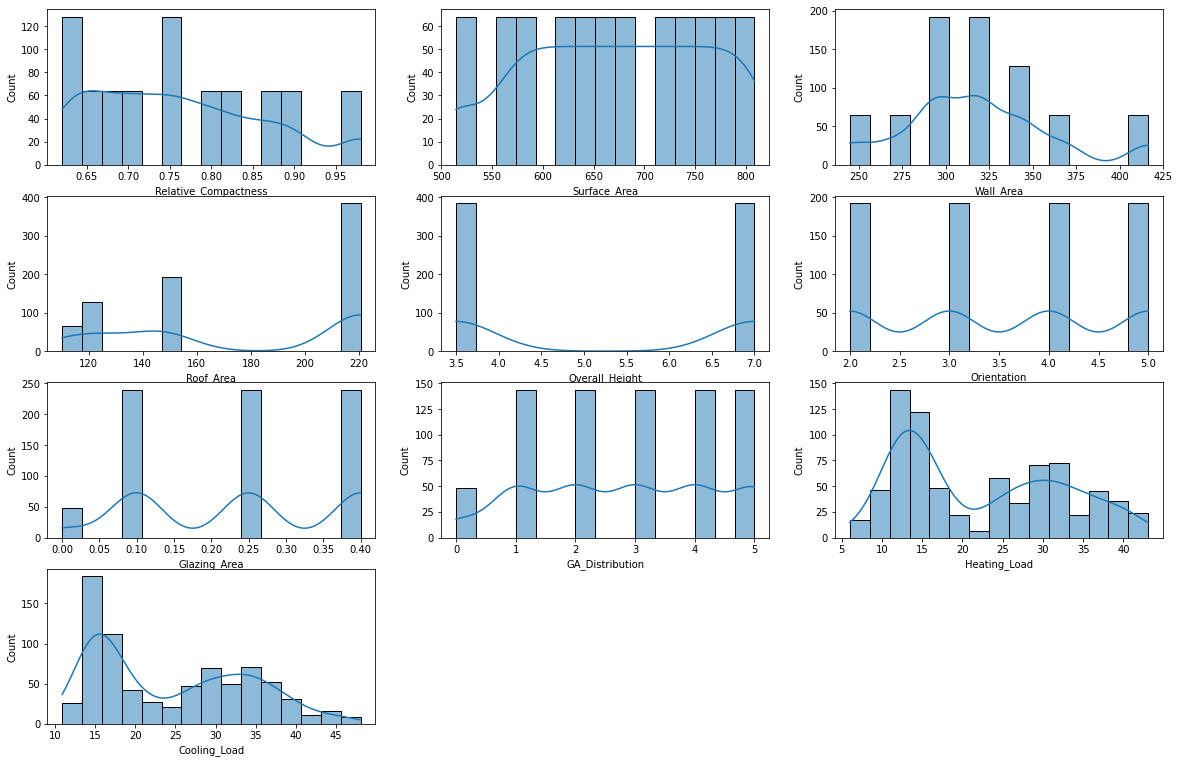

In [10]:
# Distribution of input features in data
fig =plt.figure(figsize =(20,20))
for c in range(len(data.columns)):
    fig.add_subplot(6, 3, c+1)
    sns.histplot( x = data.iloc[:,c],bins = 15 ,kde = True)
plt.show()

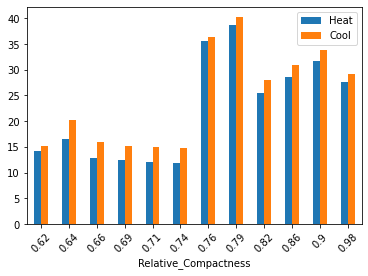

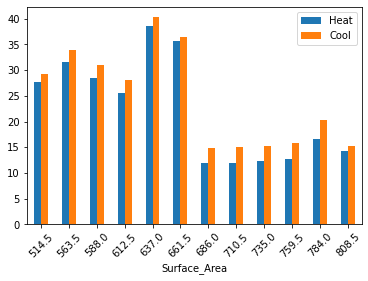

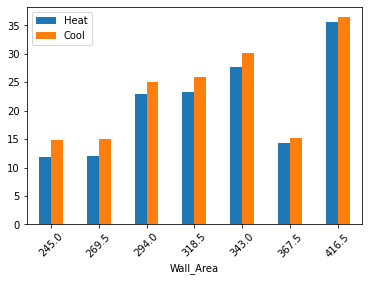

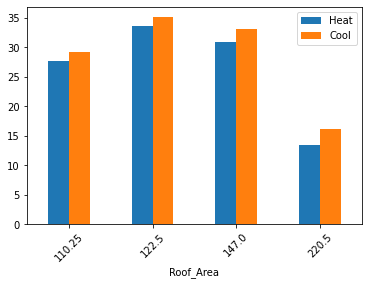

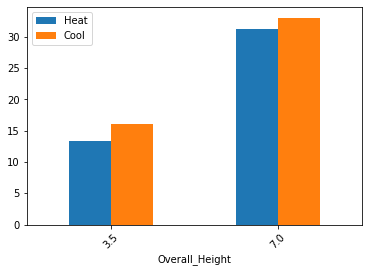

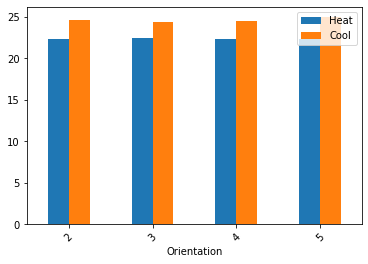

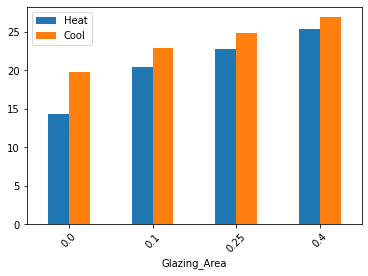

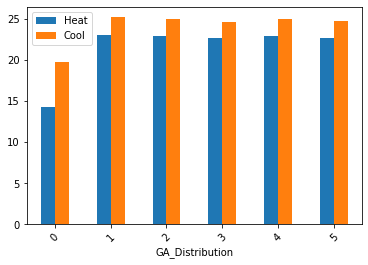

In [11]:
# Heating and Cooling load average of each input feature
label =['Heating_Load' , 'Cooling_Load']
for c in data1.columns:
    df = data.groupby(c)[label].mean()
    df1= pd.DataFrame({ c: list(df.index),
                     "Heat" :list(df.values[:,0]),
                       "Cool":list(df.values[:,1])
                      })
    df1.plot(c , y = ["Heat","Cool"], kind= 'bar')
    plt.xticks(rotation = 45)
    plt.show()   

<AxesSubplot:>

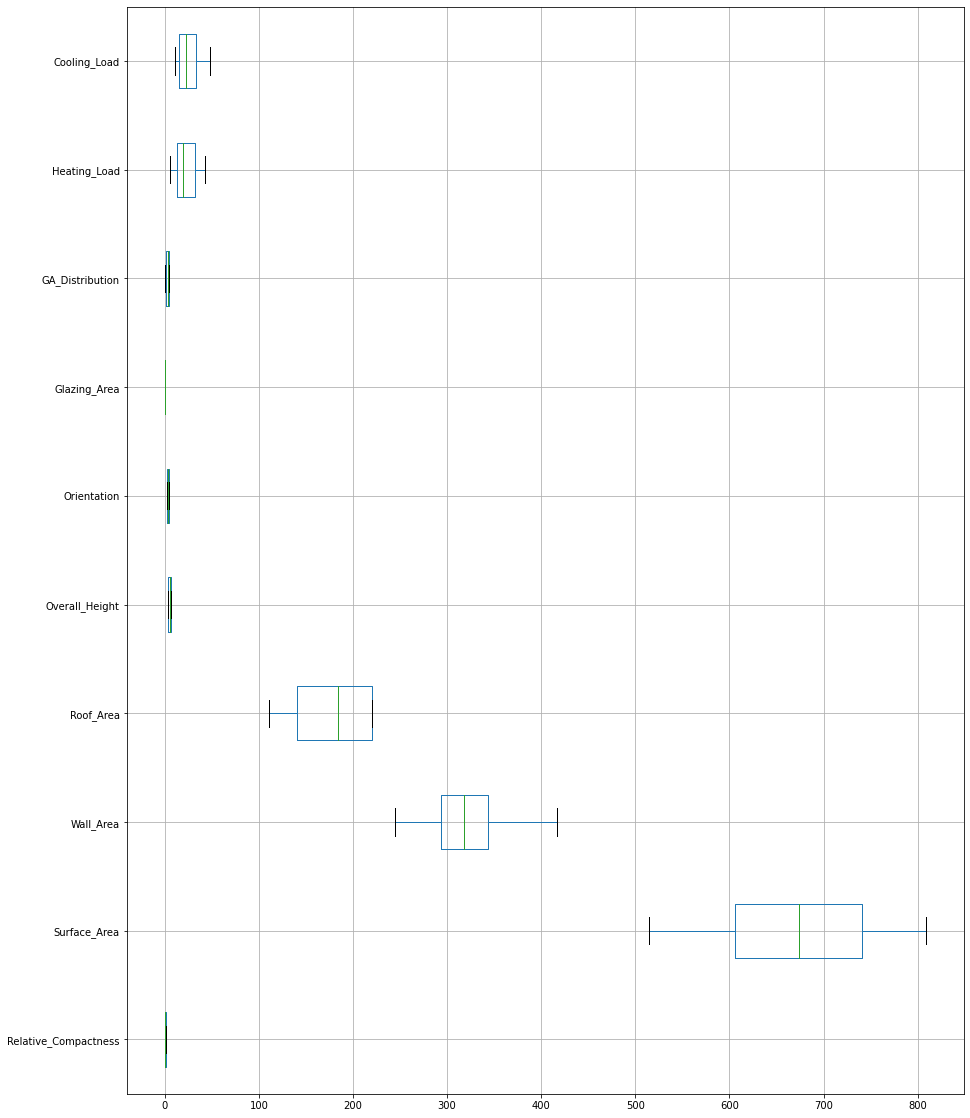

In [12]:
# ALL in ONE PLOT
plt.figure(figsize = (15,20))
data.boxplot(vert=False)

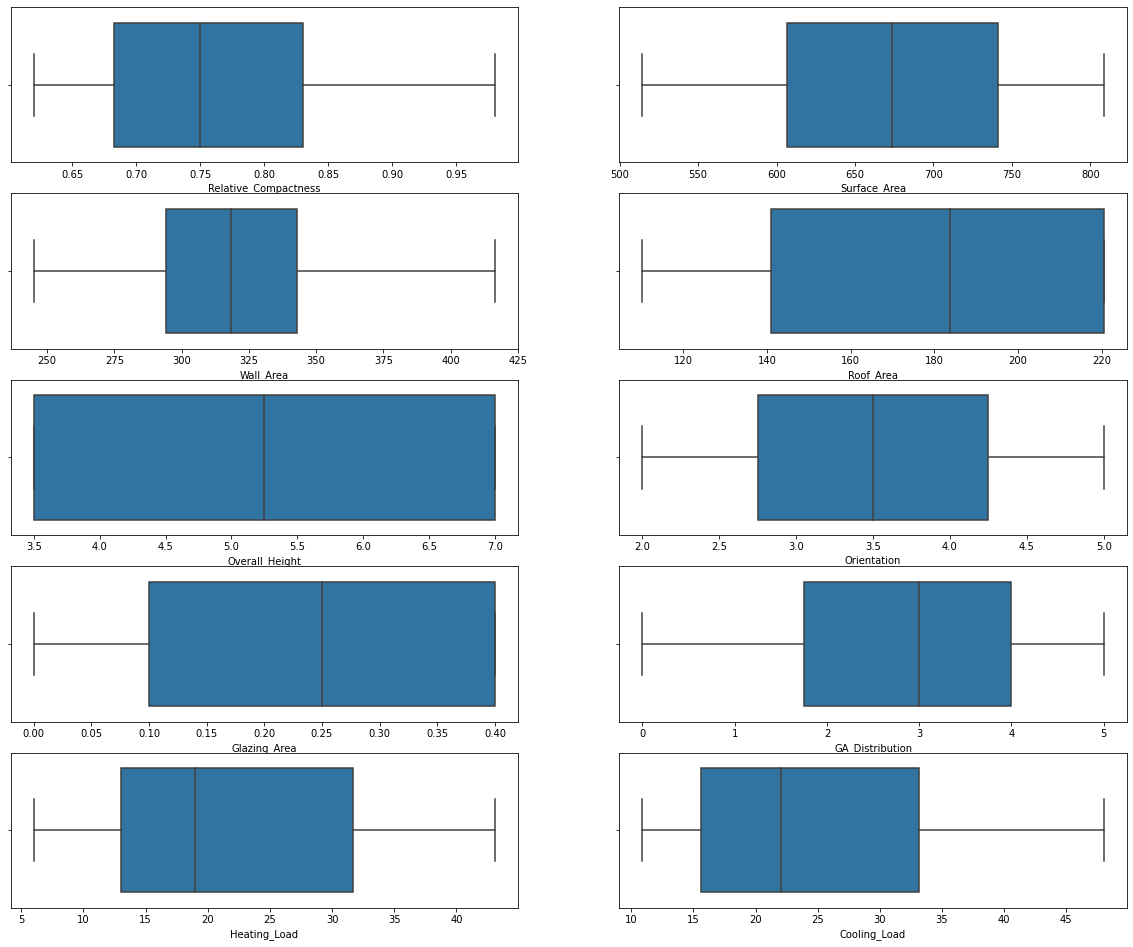

In [12]:
# Boxplot to check for outliers in the dataset which may cause negative effects on the performance of the analysis
fig =plt.figure(figsize =(20,20))

for c in range(len(data.columns)):
    fig.add_subplot(6,2, c+1)
    sns.boxplot(x = data.iloc[:,c])
plt.show()

In [13]:
# Correlation between attributes
round(data.corr(),2)

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,GA_Distribution,Heating_Load,Cooling_Load
Relative_Compactness,1.00,-0.99,-0.20,-0.87,0.83,0.00,-0.00,-0.00,0.62,0.63
Surface_Area,-0.99,1.00,0.20,0.88,-0.86,-0.00,0.00,0.00,-0.66,-0.67
Wall_Area,-0.20,0.20,1.00,-0.29,0.28,-0.00,-0.00,0.00,0.46,0.43
Roof_Area,-0.87,0.88,-0.29,1.00,-0.97,-0.00,-0.00,-0.00,-0.86,-0.86
Overall_Height,0.83,-0.86,0.28,-0.97,1.00,0.00,0.00,-0.00,0.89,0.90
Orientation,0.00,-0.00,-0.00,-0.00,0.00,1.00,-0.00,-0.00,-0.00,0.01
Glazing_Area,-0.00,0.00,-0.00,-0.00,0.00,-0.00,1.00,0.21,0.27,0.21
GA_Distribution,-0.00,0.00,0.00,-0.00,-0.00,-0.00,0.21,1.00,0.09,0.05
Heating_Load,0.62,-0.66,0.46,-0.86,0.89,-0.00,0.27,0.09,1.00,0.98
Cooling_Load,0.63,-0.67,0.43,-0.86,0.90,0.01,0.21,0.05,0.98,1.00


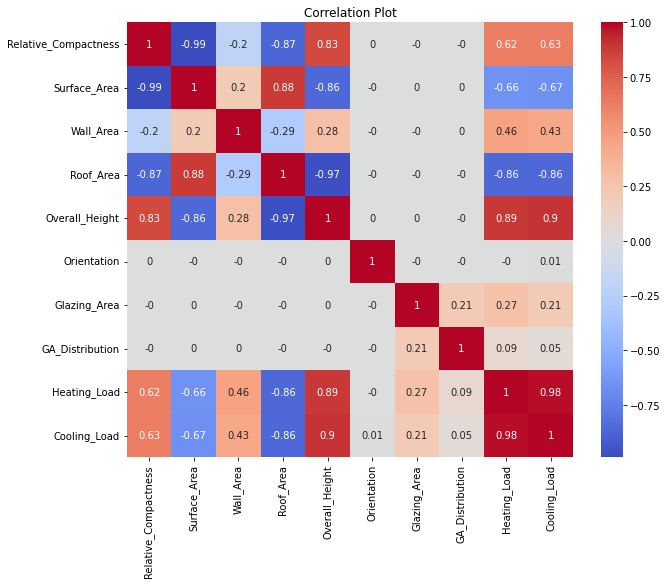

In [14]:
# Visualizing the correlation matrix using heatmap
plt.figure(figsize=(10,8))
corr = data.corr().round(2)
sns.heatmap(corr, cmap='coolwarm', annot=True)
plt.title('Correlation Plot')
plt.show()

In [15]:
# Get most correlated pairs
df = data1

def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=15):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

print("Top Absolute Correlations Pairs:\n")
print(round(get_top_abs_correlations(df,6),2))

Top Absolute Correlations Pairs:

Relative_Compactness  Surface_Area      0.99
Roof_Area             Overall_Height    0.97
Surface_Area          Roof_Area         0.88
Relative_Compactness  Roof_Area         0.87
Surface_Area          Overall_Height    0.86
Relative_Compactness  Overall_Height    0.83
dtype: float64


In [16]:
# Get top most correlated pairs
df = data

def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=15):
    au_corr = df.corr().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

print("Highly Correlated Pairs:\n")
print(round(get_top_abs_correlations(df,5),2))

Highly Correlated Pairs:

Heating_Load          Cooling_Load      0.98
Overall_Height        Cooling_Load      0.90
                      Heating_Load      0.89
Surface_Area          Roof_Area         0.88
Relative_Compactness  Overall_Height    0.83
dtype: float64


<Figure size 432x288 with 0 Axes>

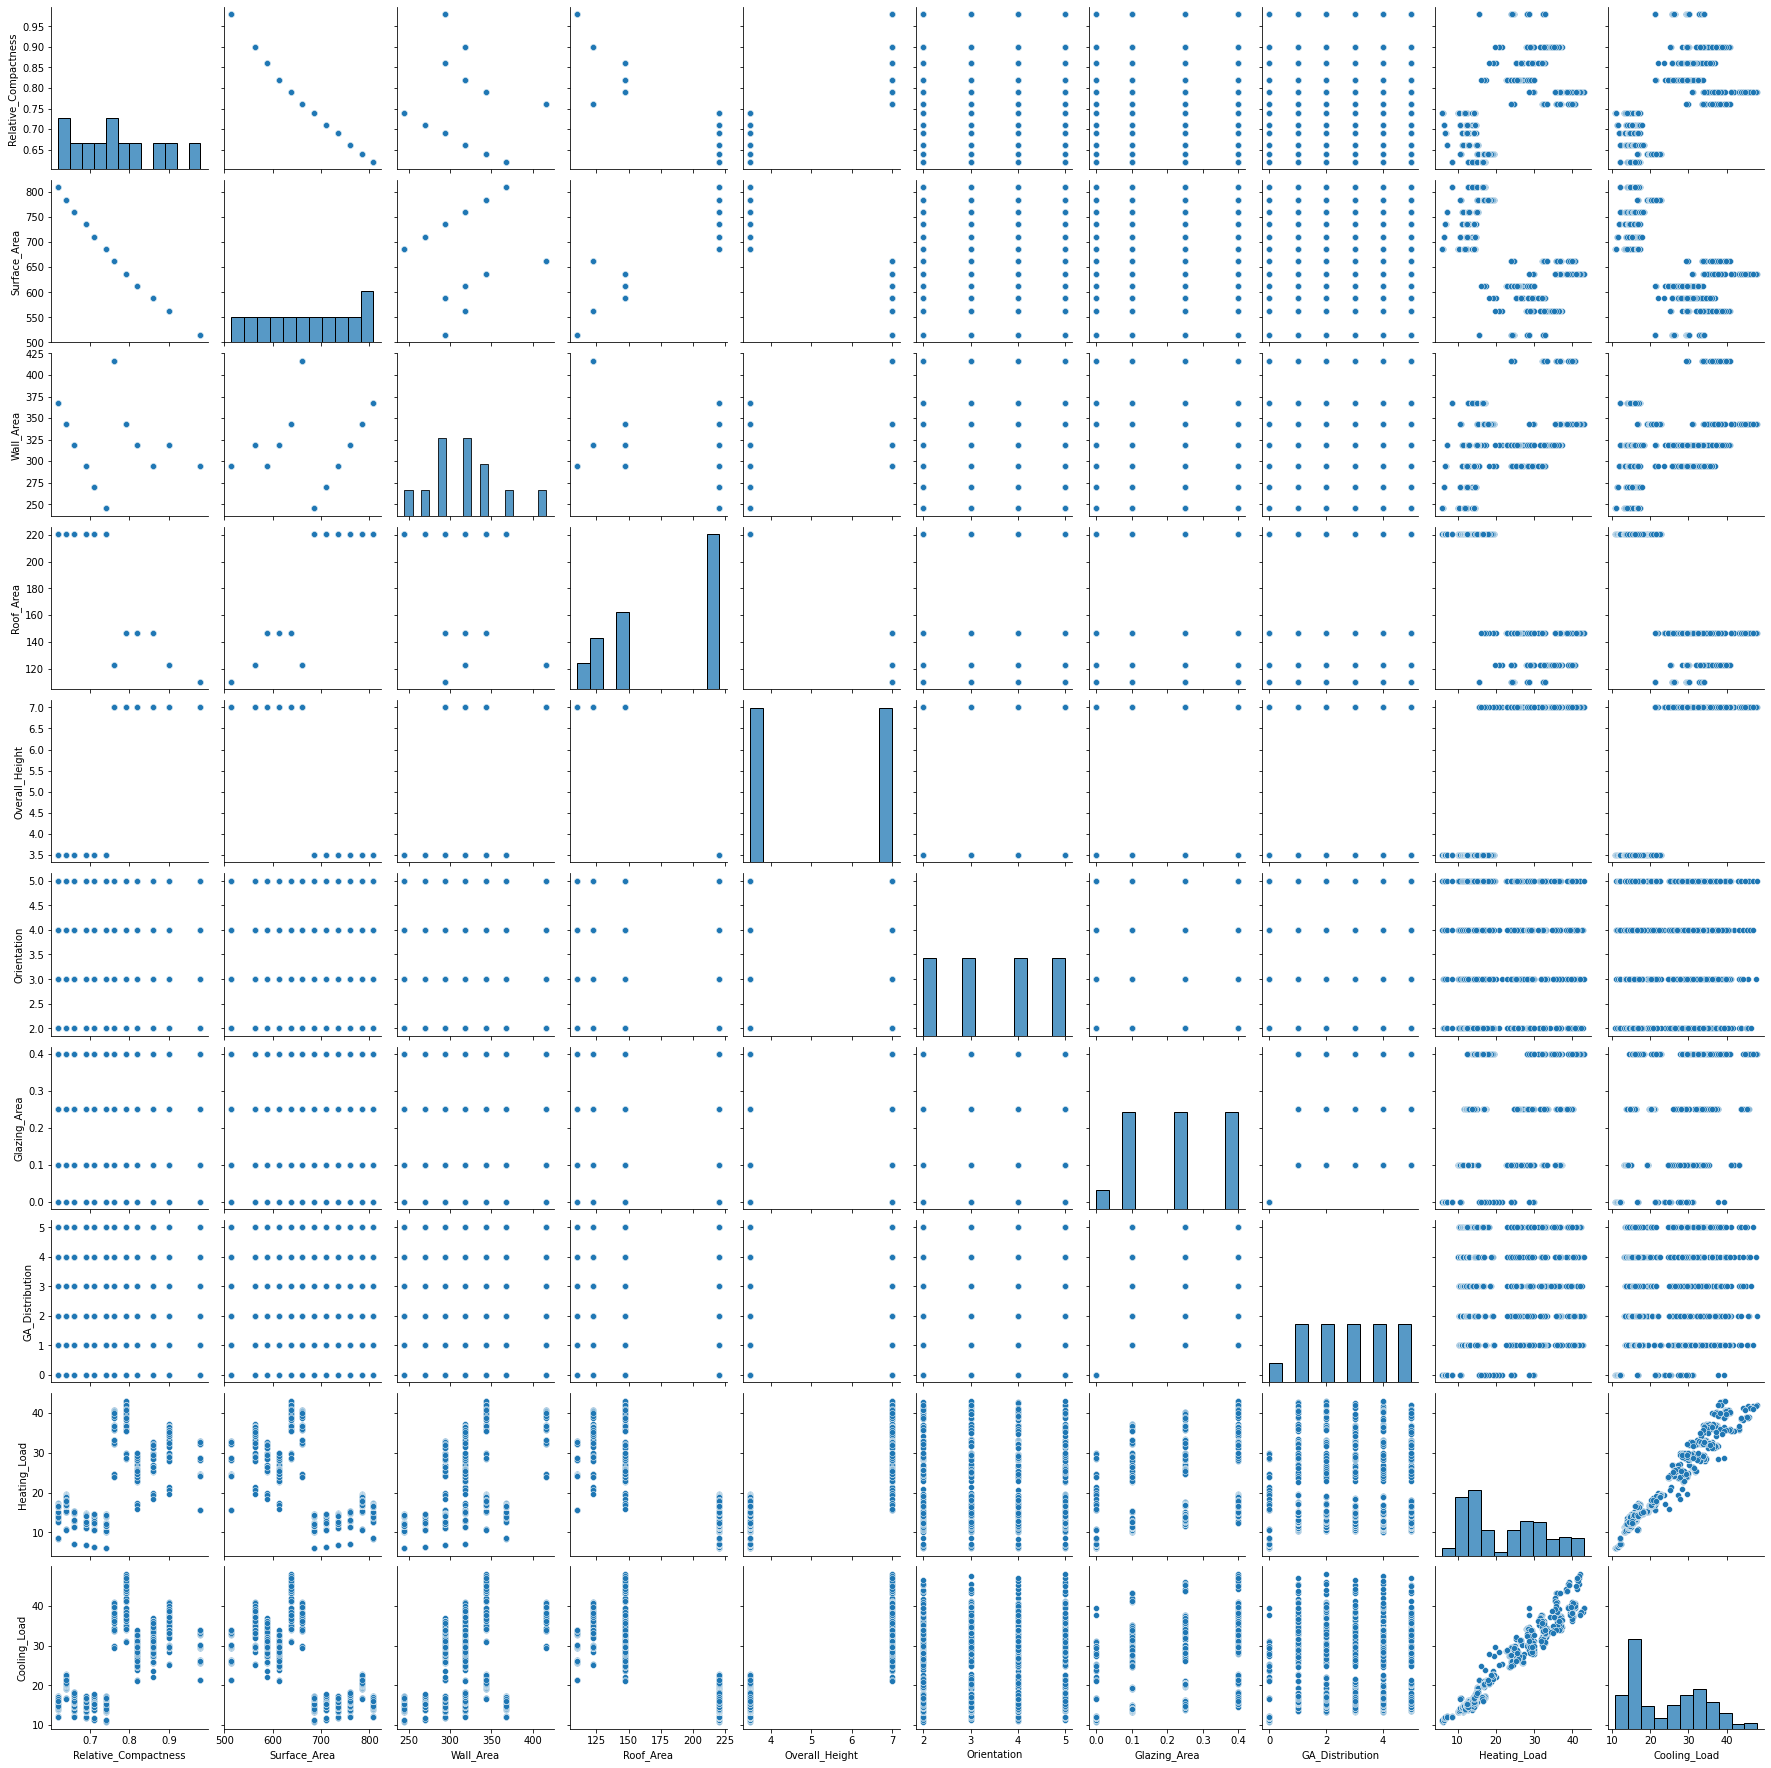

In [17]:
# PairPlot
#The diagonal axes are univariate distribution of the data for the variable in that column.
plt.figure()
sns.pairplot(data)
plt.show()

## Data Splitting

### 1 . Single-output

In [18]:
# Split the data into train and test set
from sklearn.model_selection import train_test_split
X = data.iloc[:,:-2]
y = data.iloc[:,-2:]
y1 = data[['Heating_Load']]
y2 = data[['Cooling_Load']]

In [19]:
X_train, X_test, y1_train, y1_test, y2_train, y2_test = train_test_split(X, y1, y2, test_size=0.33, random_state = 20)

# Min-Max scale
MinMax = MinMaxScaler(feature_range= (0,1))
X_train1 = MinMax.fit_transform(X_train)
X_test1 = MinMax.transform(X_test)

In [20]:
Acc = pd.DataFrame(index=None, columns= ['Model','train_HL','test_HL','train_CL','test_CL'] )
Bcc = pd.DataFrame(index=None, columns= ['Model','train_HL','test_HL','train_CL','test_CL'])

In [21]:
regressors = [['Linear Regression',LinearRegression()],
              ['K-Nearest Neighbors',  KNeighborsRegressor()] ,             
              ['DecisionTree', DecisionTreeRegressor()],
              ['RandomForest', RandomForestRegressor()],
              ['SVR', SVR()]
              ]

In [22]:
# scaled data
for mod in regressors:
    name = mod[0]
    model = mod[1]
    
    model.fit(X_train,y1_train)
    actr1 = r2_score(y1_train, model.predict(X_train))
    acte1 = r2_score(y1_test, model.predict(X_test))
    
    model.fit(X_train,y2_train)
    actr2 = r2_score(y2_train, model.predict(X_train))
    acte2 = r2_score(y2_test, model.predict(X_test))
    
    Acc = Acc.append(pd.Series({'Model':name, 'train_HL':actr1,'test_HL':acte1,'train_CL':actr2,'test_CL':acte2}),ignore_index=True )    

    
#Acc.sort_values(by='test_Cooling')

In [23]:
#RAW data

for mod in regressors:
    name = mod[0]
    model = mod[1]
    
    model.fit(X_train1,y1_train)
    actr1 = r2_score(y1_train, model.predict(X_train1))
    acte1 = r2_score(y1_test, model.predict(X_test1))
    
    model.fit(X_train1,y2_train)
    actr2 = r2_score(y2_train, model.predict(X_train1))
    acte2 = r2_score(y2_test, model.predict(X_test1))
    
    Bcc = Bcc.append(pd.Series({'Model':name, 'train_HL':actr1,'test_HL':acte1,'train_CL':actr2,'test_CL':acte2}),ignore_index=True )


### Multi-output

In [100]:
# Multi-output split
X_train , X_test,y_train, y_test = train_test_split(X,y, test_size = 0.20 , random_state = 1234)

In [101]:
# MinMaxScaler is applied feature-wise/column-wise

MinMax = MinMaxScaler()
# transform train data
X_train2 = MinMax.fit_transform(X_train)
# transform test data
X_test2 = MinMax.transform(X_test)

#X_tr_mm = pd.DataFrame(data=X_train2, columns= X_train.columns)
#X_te_mm= pd.DataFrame(data=X_test2 , columns= X_test.columns)

## Model building and Evaluation

In [145]:
# Train and evaluate different regression models 

def train_and_test_models(X_train, X_test, y_train, y_test):
    
    # Initialize different regression models
    models = [
        ("Linear Regression", LinearRegression()),
        # copy_X= True, fit_intercept= True, n_jobs= 1, positive = False
        ("K-Nearest Neighbors", KNeighborsRegressor()), 
        # algorithm = 'ball_tree', n_neighbors= 3, p= 1, weights= 'uniform')
        ("Decision Tree", DecisionTreeRegressor()),
        ("Random Forest", RandomForestRegressor()),
        ("MOR_SVR", MultiOutputRegressor(SVR(kernel="rbf", C=100, gamma=0.1, epsilon=0.1)))
       ]
    
    # Create lists to store the results
    model_names = []
    r2_tr_values = []
    mse_tr_values = []    
    rmse_tr_values=[]
    mae_tr_values = []
    r2_te_values = []
    mse_te_values = []    
    rmse_te_values=[]
    mae_te_values = []
           
    # Fit and evaluate each model
    for model_name, model in models:
        
        # fit model on train data
        model.fit(X_train, y_train)
        
        #predict on train data
        y_pred_tr = model.predict(X_train)
        
        # compute performance scores of train set
        r2_tr = r2_score(y_train, y_pred_tr)
        mse_tr = mean_squared_error(y_train, y_pred_tr)
        rmse_tr = np.sqrt(mse_tr)
        mae_tr = mean_absolute_error(y_train, y_pred_tr)
            
        #predict on test data
        y_pred = model.predict(X_test)            
 
        # compute performance scores of test set
        r2_te = r2_score(y_test, y_pred)
        mse_te = mean_squared_error(y_test, y_pred)
        rmse_te = np.sqrt(mse_te)
        mae_te = mean_absolute_error(y_test, y_pred)
               
        # Append the train values
        model_names.append(model_name)
        r2_tr_values.append(r2_tr)
        mse_tr_values.append(mse_tr)   
        rmse_tr_values.append(rmse_tr)
        mae_tr_values.append(mae_tr)
        
        # Append the train values
        r2_te_values.append(r2_te)
        mse_te_values.append(mse_te)       
        rmse_te_values.append(rmse_te)
        mae_te_values.append(mae_te)
        
        
        # Create a Dataframe       
        metrics_df=pd.DataFrame({
            'Model': model_names,
            
            'R2_train' :np.round(r2_tr_values,3),
            'MSE_tr': np.round(mse_tr_values,3),
            'RMSE_tr': np.round(rmse_tr_values,3),
            'MAE_tr': np.round(mae_tr_values,3),
            
            'R2_test': np.round(r2_te_values,3),            
            'MSE_te': np.round(mse_te_values,3),
            'RMSE_te': np.round(rmse_te_values,3),
            'MAE_te': np.round(mae_te_values,3)
            
        })
    return metrics_df

In [146]:
# Multi-output- Raw data
train_and_test_models(X_train,X_test,y_train,y_test)

,Model,R2_train,MSE_tr,RMSE_tr,MAE_tr,R2_test,MSE_te,RMSE_te,MAE_te
0,Linear Regression,0.897,9.888,3.145,2.234,0.896,9.124,3.021,2.157
1,K-Nearest Neighbors,0.968,3.083,1.756,1.253,0.921,7.003,2.646,1.925
2,Decision Tree,1.000,0.000,0.000,0.000,0.977,1.934,1.391,0.631
3,Random Forest,0.997,0.313,0.559,0.287,0.981,1.568,1.252,0.667
4,MOR_SVR,0.994,0.562,0.750,0.376,0.984,1.417,1.190,0.791


In [134]:
# Multi-output - Scaled data 
train_and_test_models(X_train2, X_test2, y_train, y_test)
#train_and_test_models(X_tr_mm, X_te_mm, y_train, y_test)

,Model,R2_train,MSE_tr,RMSE_tr,MAE_tr,R2_test,MSE_te,RMSE_te,MAE_te
0,Linear Regression,0.897,9.895,3.146,2.235,0.899,8.855,2.976,2.131
1,K-Nearest Neighbors,0.929,6.901,2.627,1.791,0.904,8.403,2.899,1.949
2,Decision Tree,1.000,0.000,0.000,0.000,0.977,1.888,1.374,0.627
3,Random Forest,0.997,0.316,0.562,0.290,0.981,1.555,1.247,0.660
4,MOR_SVR,0.910,8.625,2.937,1.821,0.926,6.424,2.535,1.560


In [113]:
# Single-output - RAW data
Bcc

,Model,train_HL,test_HL,train_CL,test_CL
0,Linear Regression,0.918186,0.910686,0.885251,0.890317
1,K-Nearest Neighbors,0.945894,0.904336,0.927198,0.889602
2,DecisionTree,1.000000,0.997199,1.000000,0.950253
3,RandomForest,0.999560,0.997598,0.995692,0.964259
4,SVR,0.930860,0.910524,0.892760,0.887407


In [114]:
# Single-output - Scaled data
Acc

,Model,train_HL,test_HL,train_CL,test_CL
0,Linear Regression,0.918015,0.910429,0.885260,0.890365
1,K-Nearest Neighbors,0.964103,0.937136,0.972268,0.951264
2,DecisionTree,1.000000,0.997157,1.000000,0.942537
3,RandomForest,0.999543,0.997849,0.995490,0.965648
4,SVR,0.683920,0.673891,0.667700,0.685569


## Hyperparameter tuning

### Linear Regression Tuning

In [147]:
# Define the model
model = LinearRegression()

# Define hyperparameters grid
param_grid = {
    'fit_intercept': [True, False],
    'copy_X': [True, False],
    'n_jobs': [1,2],
    'positive' : [True, False]
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='r2')
grid_result = grid_search.fit(X_train, y_train)

# Print best hyperparameters and corresponding score
print("Best Score: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

# Evaluate the model on the testing set with best hyperparameters
best_model = grid_result.best_estimator_
test_score = best_model.score(X_test, y_test)
print("Test Score with best hyperparameters: %f" % test_score)



Best Score: 0.890347 using {'copy_X': True, 'fit_intercept': True, 'n_jobs': 1, 'positive': False}
Test Score with best hyperparameters: 0.896104


## KNN Regression tuning

In [149]:
# Define the model
model = KNeighborsRegressor()

# Define hyperparameters grid
param_grid = {
    'n_neighbors': [1,2,3,4,5,6,7,8],  # Number of neighbors to consider
    'weights': ['uniform', 'distance'],  # Weighting method for prediction
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'p': [1, 2]  # Distance metric: 1 for Manhattan distance, 2 for Euclidean distance
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='r2')
grid_result = grid_search.fit(X_train, y_train)

# Print best hyperparameters and corresponding score
print("Best Score: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

# Evaluate the model on the testing set with best hyperparameters
best_model = grid_result.best_estimator_
test_score = best_model.score(X_test, y_test)
print("Test Score with best hyperparameters: %f" % test_score)


Best Score: 0.949056 using {'algorithm': 'ball_tree', 'n_neighbors': 3, 'p': 1, 'weights': 'uniform'}
Test Score with best hyperparameters: 0.933977


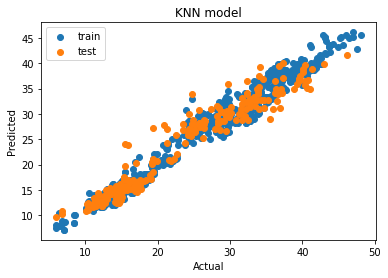

In [151]:
classes = ['train', 'test']
plt.scatter(y_train, best_model.predict(X_train))
plt.scatter(y_test, best_model.predict(X_test) )
plt.title("KNN model")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.legend(labels=classes)

In [152]:
# METRICS with hyperparameter tuned 
print('R2 train:',r2_score(y_train, best_model.predict(X_train)) )
print('R2:' , r2_score(y_test, best_model.predict(X_test)))
print('MSE:', mean_squared_error(y_test,  best_model.predict(X_test)))
print('RMSE:', np.sqrt(mean_squared_error(y_test,  best_model.predict(X_test))))
print('MAE:', mean_absolute_error(y_test, best_model.predict(X_test))) 



R2 train: 0.974887058872917
R2: 0.9339770357562214
MSE: 5.839064498644987
RMSE: 2.4164156303593525
MAE: 1.7867750677506782


## PLOTS

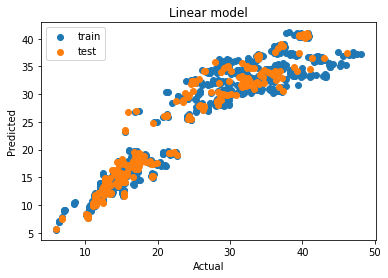

In [121]:
# 1. Linear Regression Model
LR_model = LinearRegression()
LR_model.fit(X_train, y_train)
y_pred = LR_model.predict(X_test)
classes = ['train', 'test']
plt.scatter(y_train, LR_model.predict(X_train))
plt.scatter(y_test, y_pred)
plt.title("Linear model")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.legend(labels=classes)

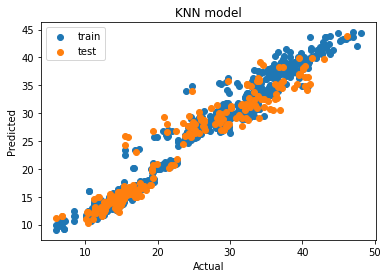

In [122]:
# 2. K-Neighbors Regressor Model
KNN_model = KNeighborsRegressor()
KNN_model.fit(X_train, y_train)
y_pred= KNN_model.predict(X_test)
classes = ['train', 'test']
plt.scatter(y_train, KNN_model.predict(X_train))
plt.scatter(y_test, y_pred)
plt.title("KNN model")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.legend(labels=classes)

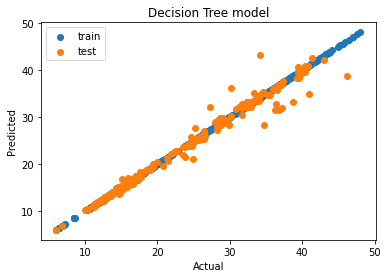

In [123]:
# 3. DecisionTree Regressor Model
DT_model = DecisionTreeRegressor()
DT_model.fit(X_train, y_train)
y_pred = DT_model.predict(X_test)
classes = ['train', 'test']
plt.scatter(y_train, DT_model.predict(X_train))
plt.scatter(y_test, y_pred)
plt.title("Decision Tree model")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.legend(labels=classes)

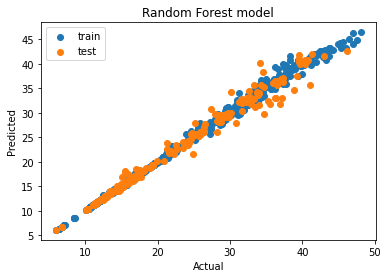

In [124]:
# 4.Random Forest Regressor Model
RF_model = RandomForestRegressor()
RF_model.fit(X_train, y_train)
y_pred = RF_model.predict(X_test)
classes = ['train', 'test']
plt.scatter(y_train, RF_model.predict(X_train))
plt.scatter(y_test, y_pred)
plt.title("Random Forest model")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.legend(labels=classes)

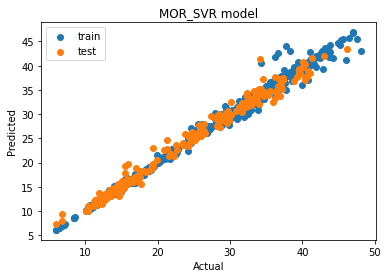

In [125]:
# 5. Multi Output Regressor Model
MOR_model = MultiOutputRegressor(SVR(kernel="rbf", C=100, gamma=0.1, epsilon=0.1))
MOR_model.fit(X_train, y_train)
y_pred = MOR_model.predict(X_test)
classes = ['train', 'test']
plt.scatter(y_train, MOR_model.predict(X_train))
plt.scatter(y_test, y_pred)
plt.title("MOR_SVR model")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.legend(labels=classes)